### Assignment 4- Grapes to Greatness: Machine Learning in Wine Quality Prediction
#### Aryan Sethi (21BCE0704)

### Task 1 : Load the Dataset

In [43]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('E:\VSCode_workshop\python_workshop\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Task 2 : Data preprocessing including visualization


In [45]:
col_names=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
df.columns=col_names
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
df.shape

(1599, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [49]:
df.isnull().sum() # There are no null values in the dataset.

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
df.describe() # Descriptive Statistics

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [51]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [52]:
# Correlation of dependent varriables with the target variable

df.corr().quality.sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

##### Univariate Analysis

<Axes: xlabel='sulphates', ylabel='Count'>

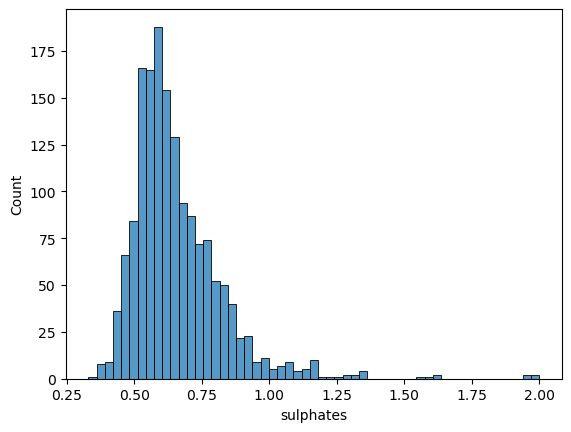

In [53]:
sns.histplot(df.sulphates)

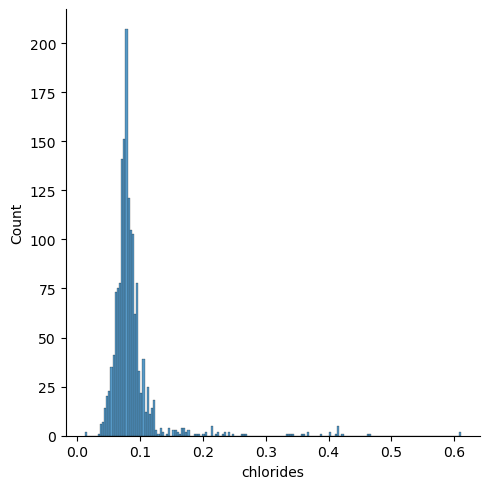

In [54]:
sns.displot(df.chlorides)

##### Bivariate Analysis

<Axes: xlabel='sulphates', ylabel='pH'>

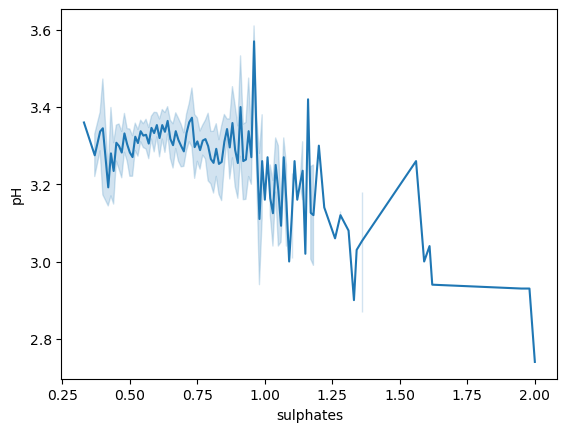

In [55]:
sns.lineplot(x=df.sulphates, y=df.pH)

<Axes: xlabel='alcohol', ylabel='pH'>

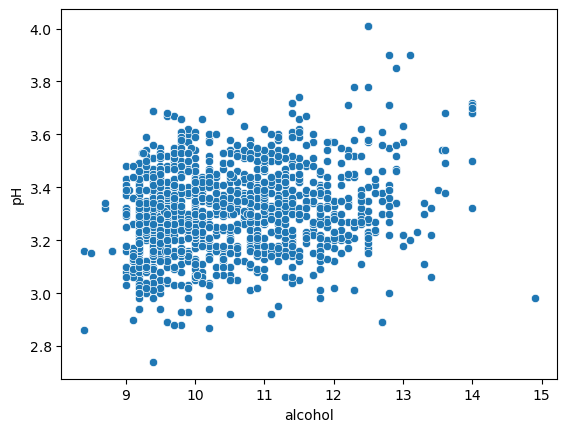

In [56]:
sns.scatterplot(x=df.alcohol, y=df.pH)

##### Multivariate Analysis

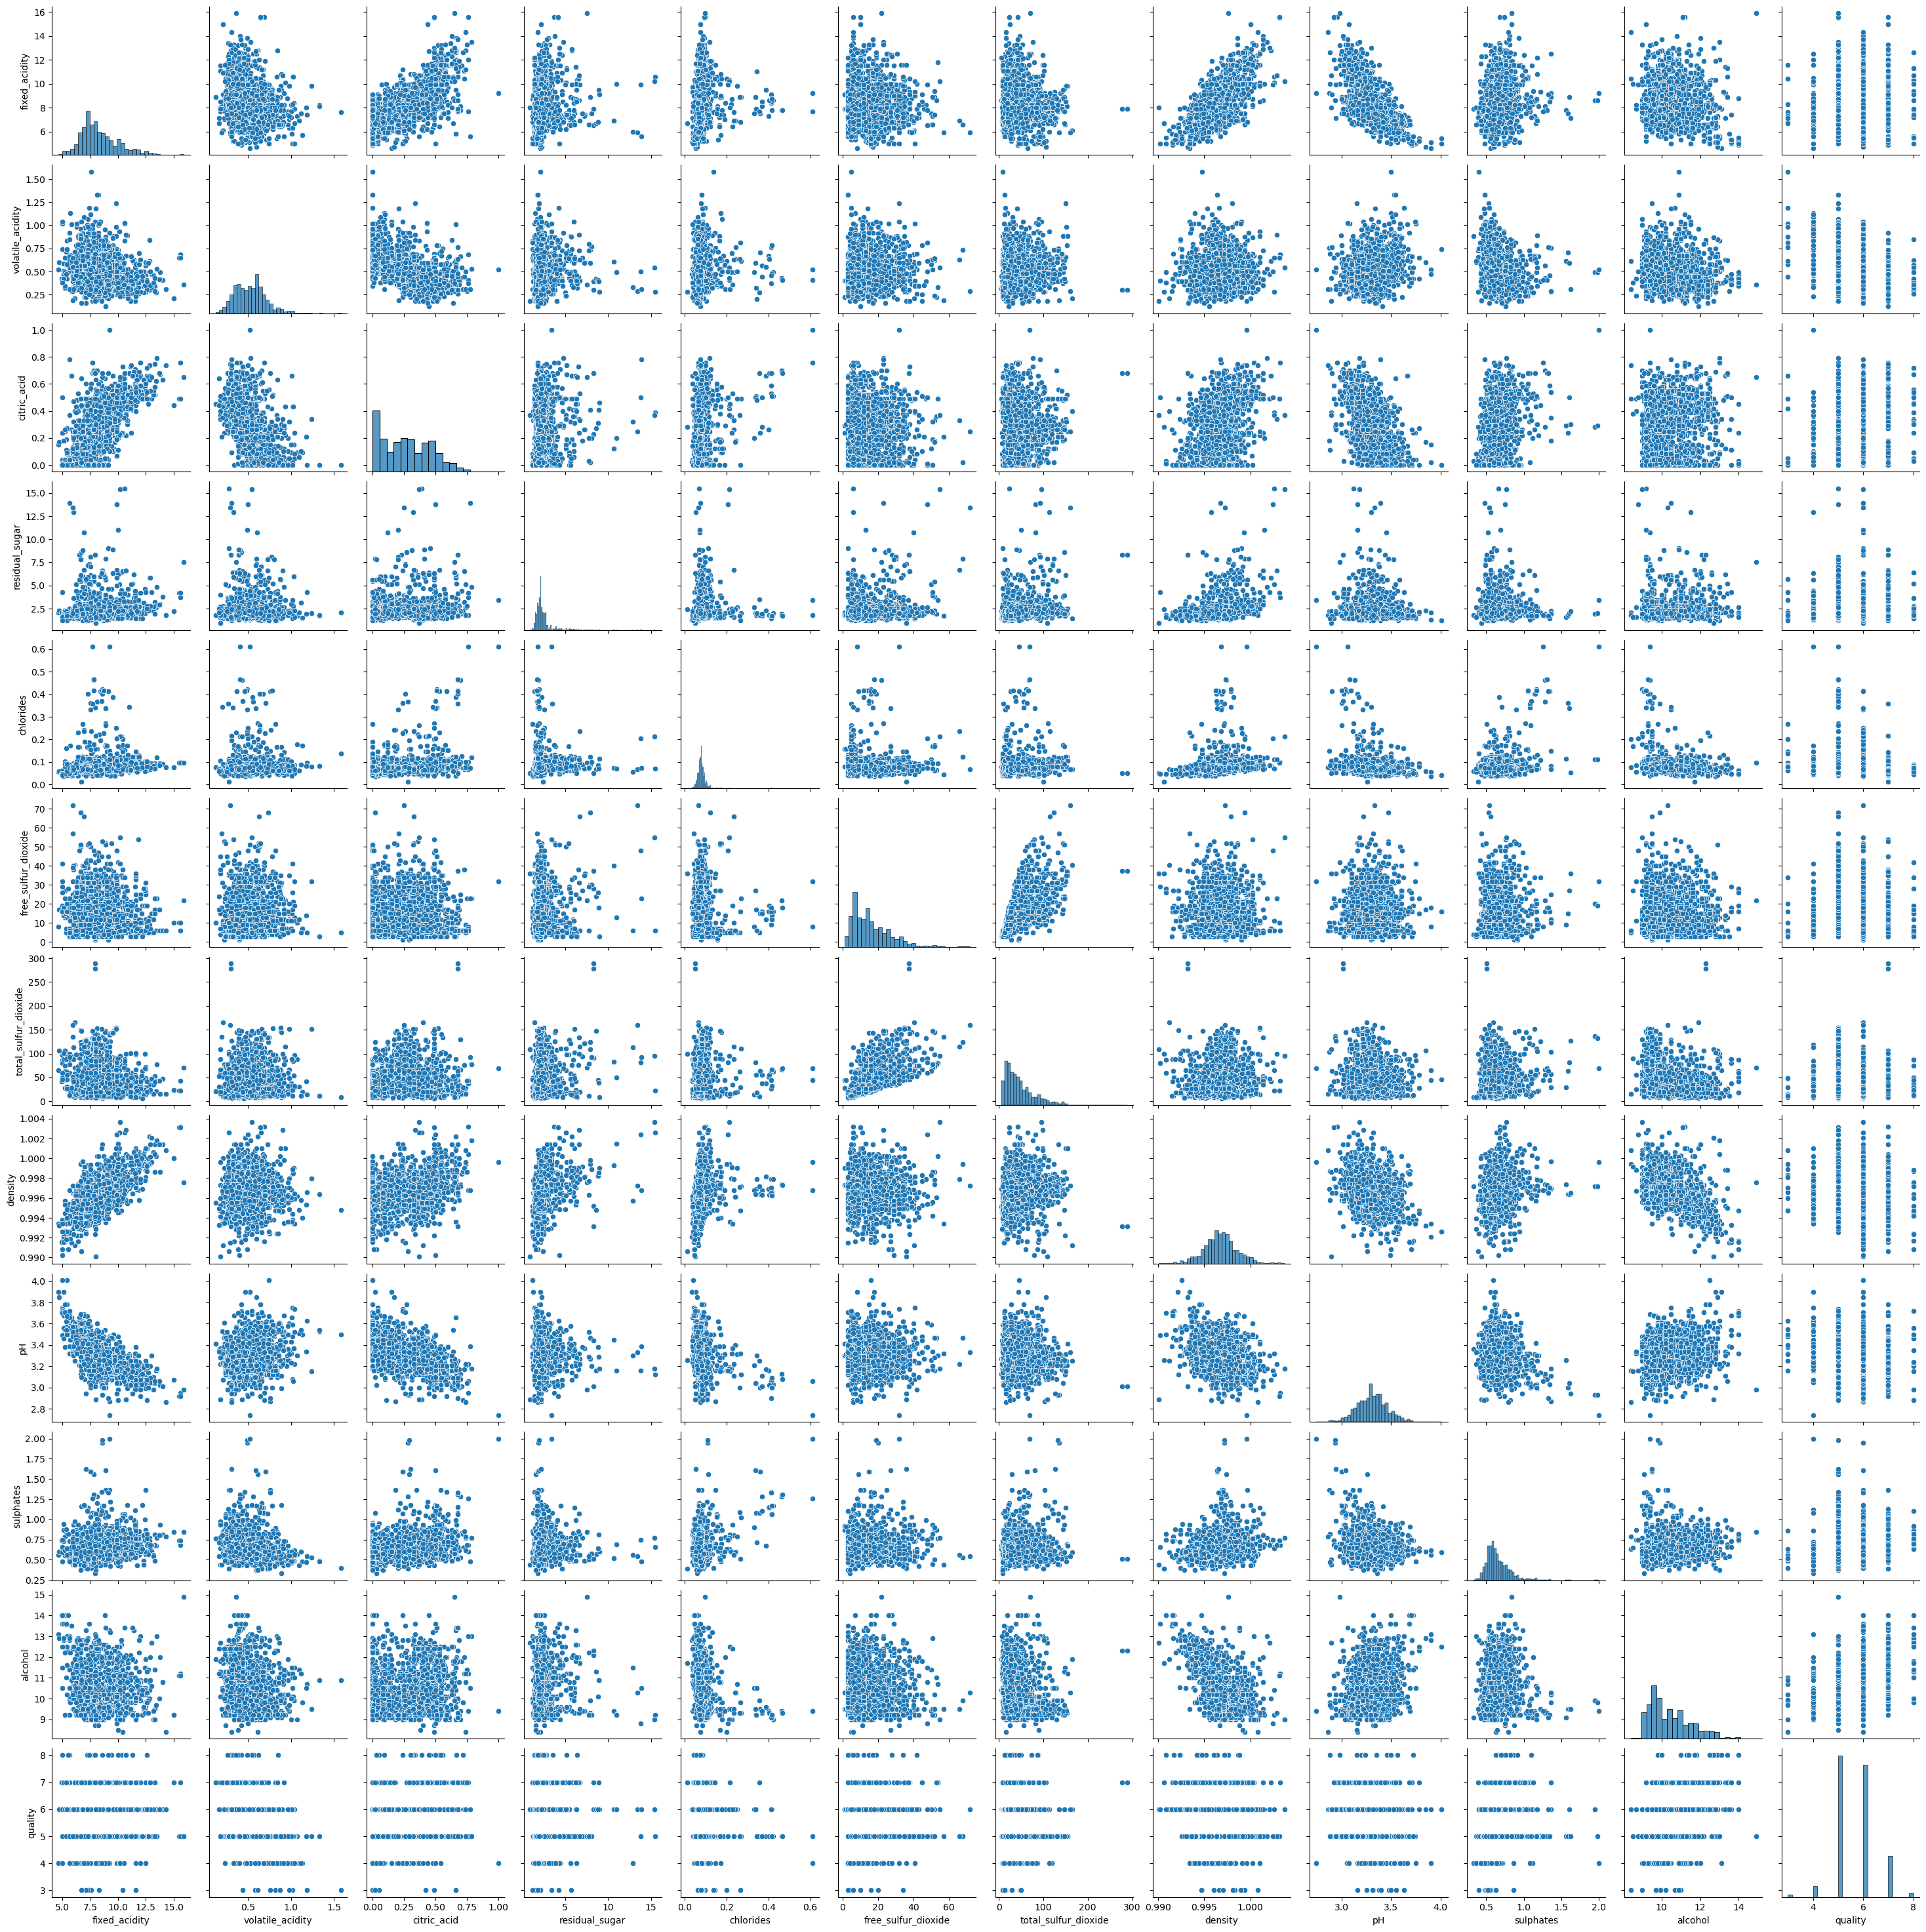

In [57]:
sns.pairplot(df)

<Axes: >

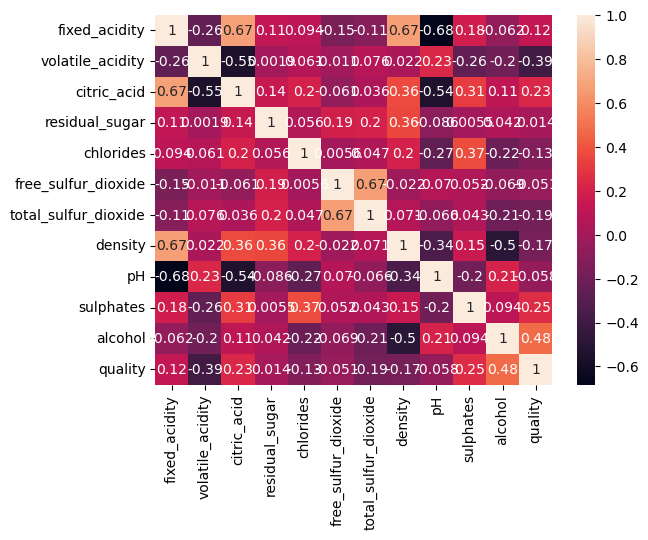

In [58]:
# Correlation Heatmap

sns.heatmap(df.corr(),annot=True)

##### Outlier Detection and removal by percentile method & IQR MEthod

In [59]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [60]:
# Removing outliers from fixed_acidity column

f1 = df['fixed_acidity'].quantile(0.25) #Q1
f3 = df['fixed_acidity'].quantile(0.75) #Q3
IQR_f = f3 - f1
upper_limit_f = f3+(1.5)*(IQR_f)
lower_limit_f = f1-(1.5)*(IQR_f)
print(f1)
print(f3)
print(IQR_f)
print(upper_limit_f)
print(lower_limit_f)

7.1
9.2
2.0999999999999996
12.349999999999998
3.95


<Axes: >

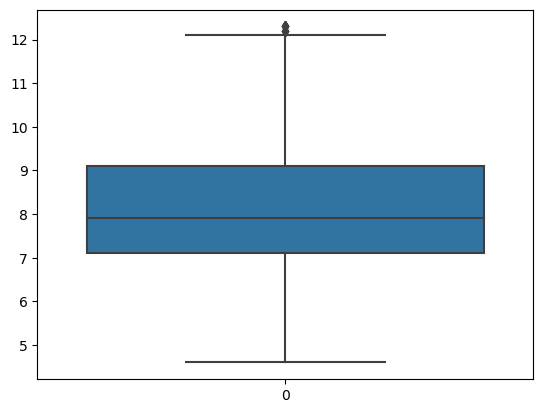

In [61]:
df=df[(df['fixed_acidity']<upper_limit_f) & (df['fixed_acidity']>lower_limit_f)]
sns.boxplot(df['fixed_acidity'])

In [63]:
fa_01=df.fixed_acidity.quantile(0.01)
fa_98=df.fixed_acidity.quantile(0.98)
print(fa_01)
print(fa_98)

5.2
11.8


<Axes: >

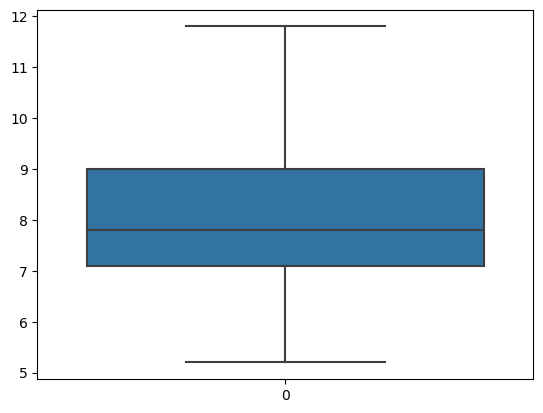

In [64]:
df=df[(df.fixed_acidity>=fa_01) & (df.fixed_acidity<=fa_98)]
sns.boxplot(df.fixed_acidity)

In [65]:
# Removing outliers from volatile_acidity column

v1 = df.volatile_acidity.quantile(0.25) #Q1
v3 = df.volatile_acidity.quantile(0.75) #Q3
IQR_v = v3 - v1
upper_limit_v = v3+(1.5)*(IQR_v)
lower_limit_v = v1-(1.5)*(IQR_v)
print(v1)
print(v3)
print(IQR_v)
print(upper_limit_v)
print(lower_limit_v)

0.4
0.64
0.24
1.0
0.040000000000000036


<Axes: >

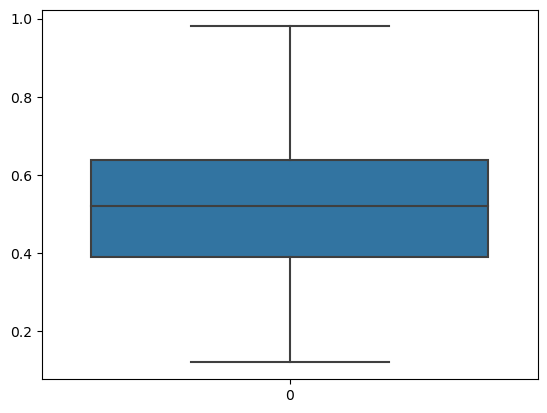

In [66]:
df=df[(df.volatile_acidity<upper_limit_v) & (df.volatile_acidity>lower_limit_v)]
sns.boxplot(df.volatile_acidity)

In [67]:
# Removing outliers from citric_acid column

c1 = df.citric_acid.quantile(0.25) #Q1
c3 = df.citric_acid.quantile(0.75) #Q3
IQR_c = c3 - c1
upper_limit_c = c3+(1.5)*(IQR_c)
lower_limit_c = c1-(1.5)*(IQR_c)
print(c1)
print(c3)
print(IQR_c)
print(upper_limit_c)
print(lower_limit_c)

0.09
0.4
0.31000000000000005
0.8650000000000001
-0.3750000000000001


<Axes: >

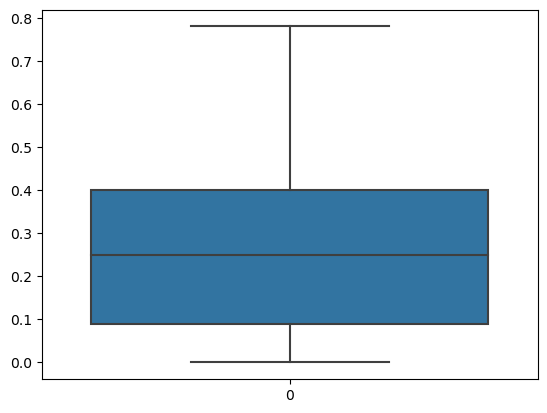

In [68]:
df=df[(df.citric_acid<upper_limit_c) & (df.citric_acid>lower_limit_c)]
sns.boxplot(df.citric_acid)

In [69]:
# Removing outliers from residual_sugar column

r1 = df.residual_sugar.quantile(0.25) #Q1
r3 = df.residual_sugar.quantile(0.75) #Q3
IQR_r = r3 - r1
upper_limit_r = r3+(1.5)*(IQR_r)
lower_limit_r = r1-(1.5)*(IQR_r)
print(r1)
print(r3)
print(IQR_r)
print(upper_limit_r)
print(lower_limit_r)

1.9
2.6
0.7000000000000002
3.6500000000000004
0.8499999999999996


<Axes: >

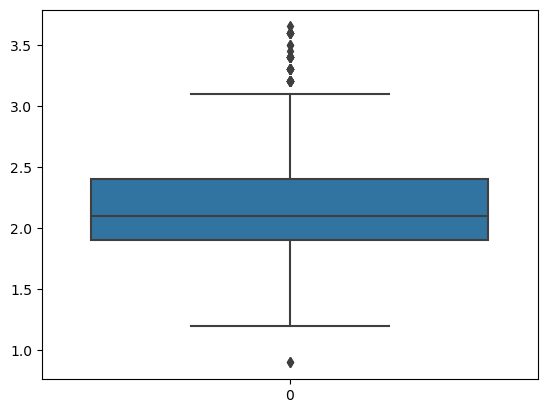

In [70]:
df=df[(df.residual_sugar<upper_limit_r) & (df.residual_sugar>lower_limit_r)]
sns.boxplot(df.residual_sugar)

In [71]:
rs_02=df.residual_sugar.quantile(0.02)
rs_96=df.residual_sugar.quantile(0.96)
print(rs_02)
print(rs_96)

1.4
3.0


<Axes: >

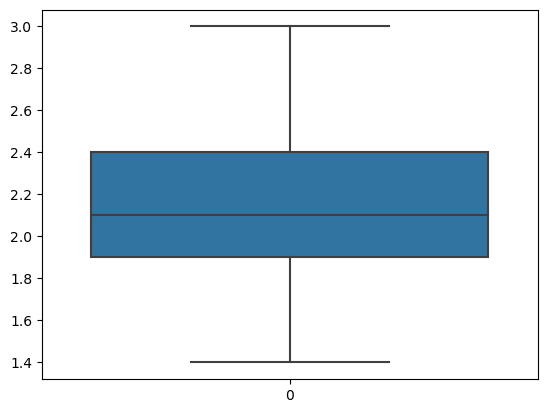

In [72]:
df=df[(df.residual_sugar>=rs_02) & (df.residual_sugar<=rs_96)]
sns.boxplot(df.residual_sugar)

In [73]:
# Removing outliers from chlorides column

ch1 = df.chlorides.quantile(0.25) #Q1
ch3 = df.chlorides.quantile(0.75) #Q3
IQR_ch = ch3 - ch1
upper_limit_ch = ch3+(1.5)*(IQR_ch)
lower_limit_ch = ch1-(1.5)*(IQR_ch)
print(ch1)
print(ch3)
print(IQR_ch)
print(upper_limit_ch)
print(lower_limit_ch)

0.07
0.089
0.01899999999999999
0.11749999999999998
0.04150000000000002


<Axes: >

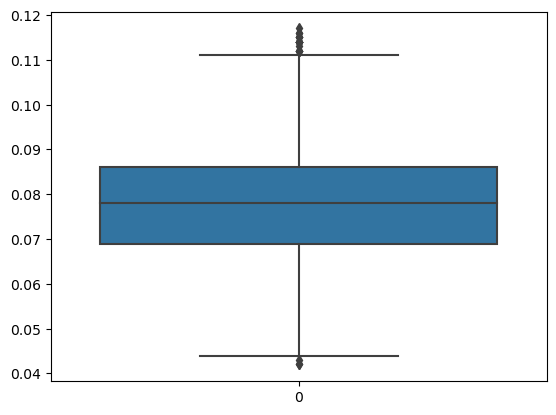

In [74]:
df=df[(df.chlorides<upper_limit_ch) & (df.chlorides>lower_limit_ch)]
sns.boxplot(df.chlorides)

In [75]:
ch_01=df.chlorides.quantile(0.01)
ch_97=df.chlorides.quantile(0.97)
print(ch_01)
print(ch_97)

0.047
0.107


<Axes: >

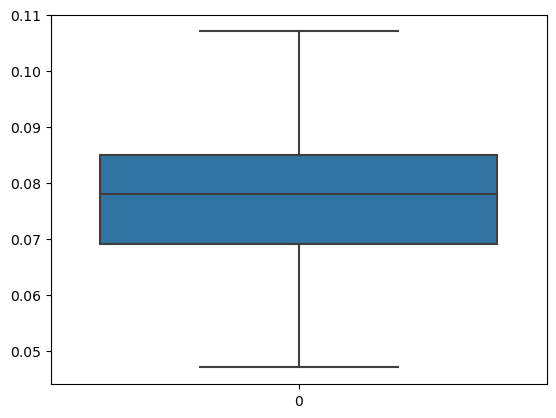

In [76]:
df=df[(df.chlorides>=ch_01) & (df.chlorides<=ch_97)]
sns.boxplot(df.chlorides)

In [77]:
# Removing outliers from free_sulfur_dioxide column

fs1 = df.free_sulfur_dioxide.quantile(0.25) #Q1
fs3 = df.free_sulfur_dioxide.quantile(0.75) #Q3
IQR_fs = fs3 - fs1
upper_limit_fs = fs3+(1.5)*(IQR_fs)
lower_limit_fs = fs1-(1.5)*(IQR_fs)
print(fs1)
print(fs3)
print(IQR_fs)
print(upper_limit_fs)
print(lower_limit_fs)

8.0
21.0
13.0
40.5
-11.5


<Axes: >

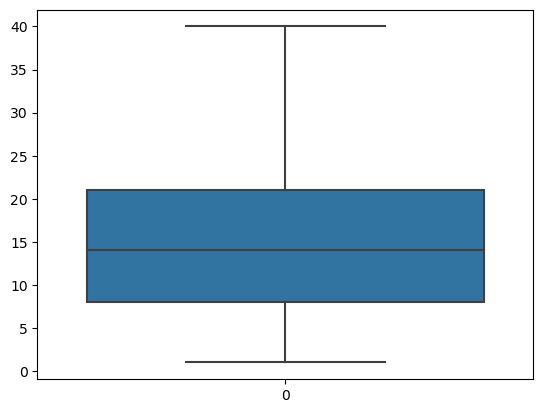

In [78]:
df=df[(df.free_sulfur_dioxide<upper_limit_fs) & (df.free_sulfur_dioxide>lower_limit_fs)]
sns.boxplot(df.free_sulfur_dioxide)

In [79]:
# Removing outliers from total_sulfur_dioxide column

ts1 = df.total_sulfur_dioxide.quantile(0.25) #Q1
ts3 = df.total_sulfur_dioxide.quantile(0.75) #Q3
IQR_ts = ts3 - ts1
upper_limit_ts = ts3+(1.5)*(IQR_ts)
lower_limit_ts = ts1-(1.5)*(IQR_ts)
print(ts1)
print(ts3)
print(IQR_ts)
print(upper_limit_ts)
print(lower_limit_ts)

23.0
58.0
35.0
110.5
-29.5


<Axes: >

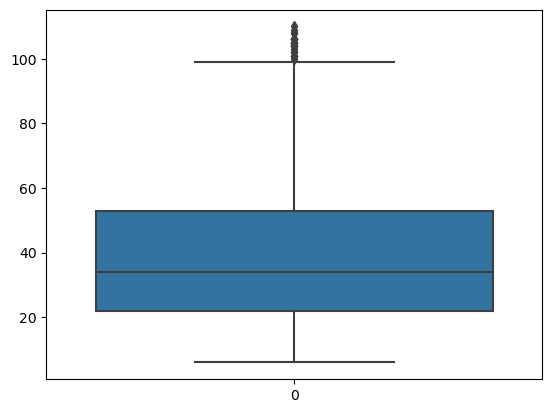

In [80]:
df=df[(df.total_sulfur_dioxide<upper_limit_ts) & (df.total_sulfur_dioxide>lower_limit_ts)]
sns.boxplot(df.total_sulfur_dioxide)

In [81]:
ts_01=df.total_sulfur_dioxide.quantile(0.01)
ts_97=df.total_sulfur_dioxide.quantile(0.97)
print(ts_01)
print(ts_97)

8.0
96.0


<Axes: >

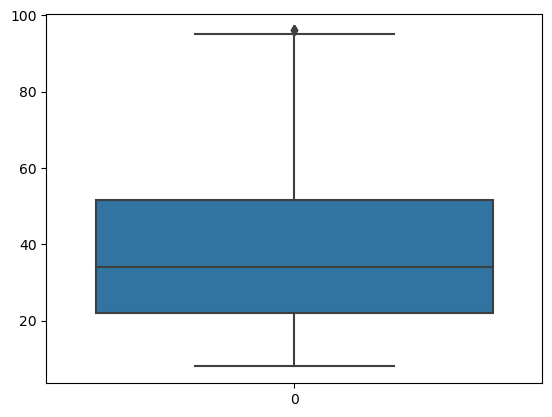

In [82]:
df=df[(df.total_sulfur_dioxide>=ts_01) & (df.total_sulfur_dioxide<=ts_97)]
sns.boxplot(df.total_sulfur_dioxide)

In [83]:
# Removing outliers from density column

d1 = df.density.quantile(0.25) #Q1
d3 = df.density.quantile(0.75) #Q3
IQR_d = d3 - d1
upper_limit_d = d3+(1.5)*(IQR_d)
lower_limit_d = d1-(1.5)*(IQR_d)
print(d1)
print(d3)
print(IQR_d)
print(upper_limit_d)
print(lower_limit_d)

0.99546
0.99744
0.0019799999999999818
1.00041
0.9924900000000001


<Axes: >

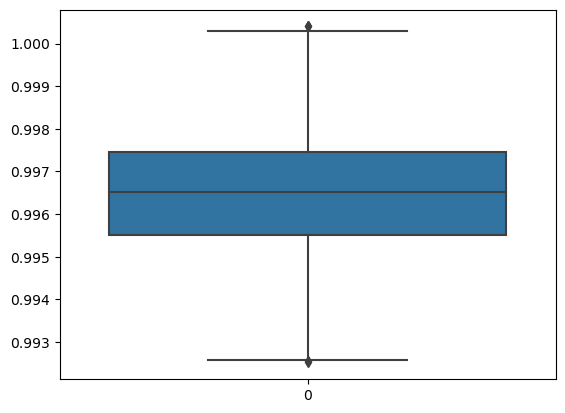

In [84]:
df=df[(df.density<upper_limit_d) & (df.density>lower_limit_d)]
sns.boxplot(df.density)

In [85]:
d_01=df.density.quantile(0.01)
d_99=df.density.quantile(0.99)
print(d_01)
print(d_99)

0.9931896
1.0


<Axes: >

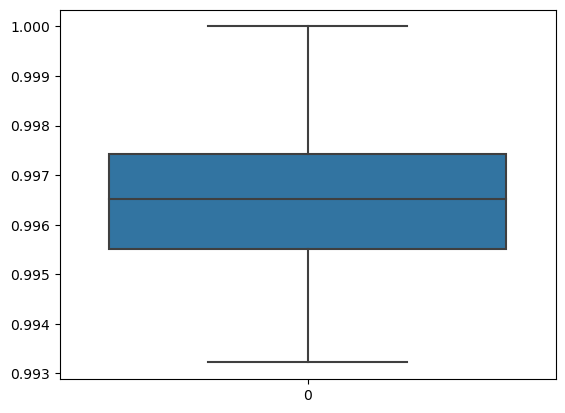

In [86]:
df=df[(df.density>=d_01) & (df.density<=d_99)]
sns.boxplot(df.density)

In [87]:
# Removing outliers from pH column

pH1 = df.pH.quantile(0.25) #Q1
pH3 = df.pH.quantile(0.75) #Q3
IQR_pH = pH3 - pH1
upper_limit_pH = pH3+(1.5)*(IQR_pH)
lower_limit_pH = pH1-(1.5)*(IQR_pH)
print(pH1)
print(pH3)
print(IQR_pH)
print(upper_limit_pH)
print(lower_limit_pH)

3.24
3.41
0.16999999999999993
3.665
2.9850000000000003


<Axes: >

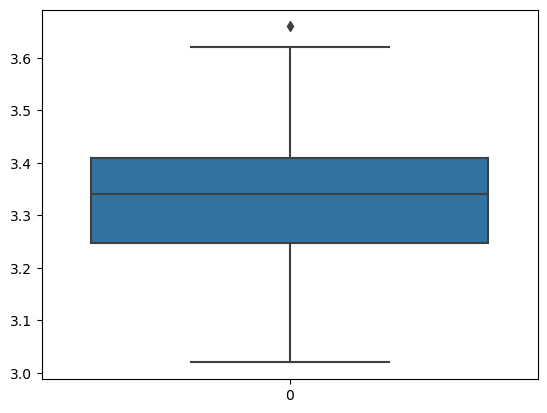

In [88]:
df=df[(df.pH<upper_limit_pH) & (df.pH>lower_limit_pH)]
sns.boxplot(df.pH)

In [89]:
pH_01=df.pH.quantile(0.01)
pH_99=df.pH.quantile(0.99)
print(pH_01)
print(pH_99)

3.06
3.6016999999999997


<Axes: >

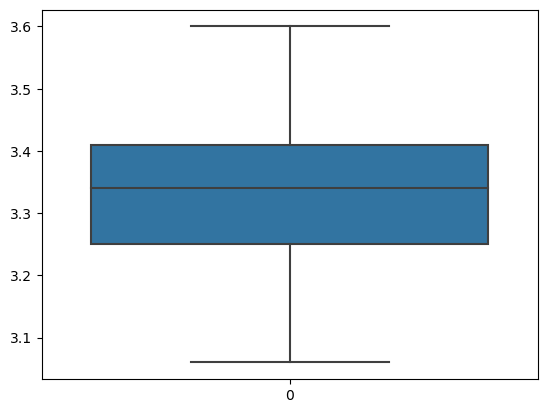

In [90]:
df=df[(df.pH>=pH_01) & (df.pH<=pH_99)]
sns.boxplot(df.pH)

In [91]:
# Removing outliers from fixed_acidity column

su_01=df.sulphates.quantile(0.01)
su_98=df.sulphates.quantile(0.98)
print(su_01)
print(su_98)

0.43
0.93


<Axes: >

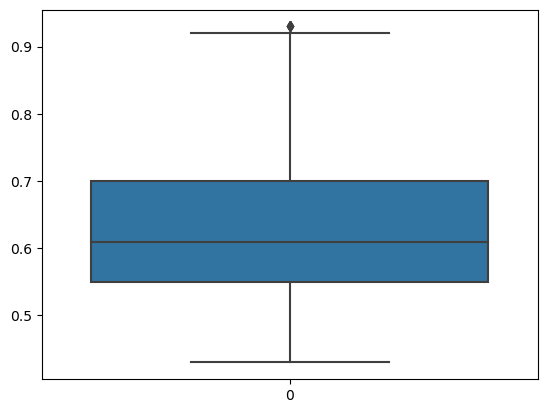

In [92]:
df=df[(df.sulphates>=su_01) & (df.sulphates<=su_98)]
sns.boxplot(df.sulphates)

In [93]:
# Removing outliers from alcohol column

a_01=df.alcohol.quantile(0.01)
a_99=df.alcohol.quantile(0.99)
print(a_01)
print(a_99)

9.0
12.8


<Axes: >

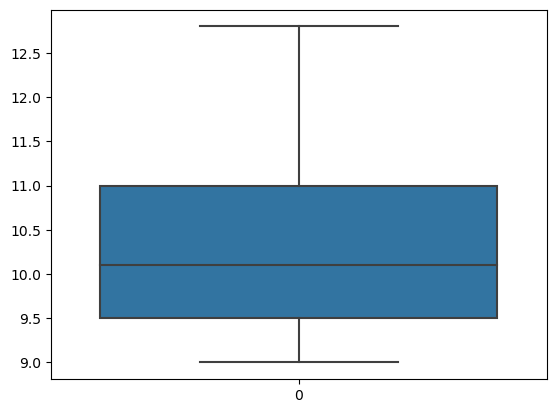

In [94]:
df=df[(df.alcohol>=a_01) & (df.alcohol<=a_99)]
sns.boxplot(df.alcohol)

##### Therefore all the outliers are removed

### Task - 3 : Machine Learning Model Building

In [95]:
# split into X and y

X =df.iloc[:,:-1]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [96]:
Y =df.quality
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Label Binarisation (Conidering alcohol quality > 7 as good and assigning '1' to it else assigning '0')

In [97]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [98]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1593    0
1594    0
1595    0
1596    0
1597    0
Name: quality, Length: 932, dtype: int64


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [100]:
X_train.shape

(745, 11)

In [101]:
X_test.shape

(187, 11)

In [102]:
print(Y.shape, Y_train.shape, Y_test.shape)

(932,) (745,) (187,)


### Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=2,splitter='best',criterion='entropy')
model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [104]:
d_y_predict = model1.predict(X_test)
d_y_predict

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [105]:
d_y_predict_train = model1.predict(X_train)

### Task - 4 : Evaluating the model (Decision tree classifier)

In [106]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Testing Accuracy = ', accuracy_score(Y_test,d_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,d_y_predict_train))

Testing Accuracy =  0.8877005347593583
Training Accuracy =  0.8845637583892617


### Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(n_estimators=200,criterion='entropy')
model2.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [108]:
r_y_predict = model2.predict(X_test)
r_y_predict_train = model2.predict(X_train)

### Task - 4 : Evaluating Random Forest Model

In [109]:
print('Testing Accuracy = ', accuracy_score(Y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(Y_train,r_y_predict_train))

Testing Accuracy =  0.9411764705882353
Training Accuracy =  1.0


### Naive Bayesian Classification Model

In [110]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [111]:
y_pred2 = gnb.predict(X_test)
y_pred2

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

### Task - 4 : Evaluating Naive Bayesian Classification Model

In [112]:
from sklearn.metrics import accuracy_score
gnb_acc=accuracy_score(Y_test,y_pred2)
gnb_acc

0.8877005347593583

#### Accuracies of all the algorithms used in model building phase :

##### Decision Tree Classification : 87.93 %

##### Random Forset Classification : 94.25 %

##### Naive Bayesian Classification : 88.50 %

#### Conclusion : Random Forest Classifier Model is best suited for the wine quality dataset.

### Task - 5 : Test with random observation

In [117]:
input_data = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
prediction = model1.predict([input_data])
prediction

e:\AnacondaNew\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### According to "decision tree classifier" model, the above random observation gives prediction "array([0])" i.e., bad quality alcohol

In [114]:
input_data_2 = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
prediction2 = model2.predict([input_data_2])
prediction2

e:\AnacondaNew\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#### According to "Random Forest classifier" model, the above random observation gives prediction "array([0])" i.e., bad quality alcohol

In [115]:
input_data_3 = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
prediction3 = gnb.predict([input_data_3])
prediction3

e:\AnacondaNew\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### According to "Naive Bayesian classifier" model, the above random observation gives prediction "array([0])" i.e., bad quality alcohol

#### CONCLUSION : For the same random observation, all the three models gave the "alchohol quality is BAD"